# import library functions

In [1]:
import matplotlib.pyplot as plt, pandas as pd, numpy as np
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import LabelEncoder
# import classification algorithms
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
%matplotlib inline

In [2]:
df = pd.read_csv('tips.csv',index_col='UID')
print(df.head())

     ID    Tipster        Date      Track              Horse Bet Type  Odds  \
UID                                                                           
1     1  Tipster A  24/07/2015      Ascot          Fredricka      Win  8.00   
2     2  Tipster A  24/07/2015     Thirsk      Spend A Penny      Win  4.50   
3     3  Tipster A  24/07/2015       York  Straightothepoint      Win  7.00   
4     4  Tipster A  24/07/2015  Newmarket     Miss Inga Sock      Win  5.00   
5     5  Tipster A  25/07/2015      Ascot              Peril      Win  4.33   

    Result TipsterActive  
UID                       
1     Lose          True  
2     Lose          True  
3     Lose          True  
4     Lose          True  
5      Win          True  


# Data wrangling

## Univariate analysis 

In [3]:
print(df.dtypes)

ID                 int64
Tipster           object
Date              object
Track             object
Horse             object
Bet Type          object
Odds             float64
Result            object
TipsterActive       bool
dtype: object


In [4]:
# collecting categorical varibale names 
cat_var = df.dtypes.loc[df.dtypes=='object'].index
print(cat_var)

Index([u'Tipster', u'Date', u'Track', u'Horse', u'Bet Type', u'Result'], dtype='object')


In [5]:
# check for unique variables in cat_var
df[cat_var].apply(lambda x: len(x.unique()))

Tipster        31
Date         1055
Track         116
Horse       15785
Bet Type        2
Result          2
dtype: int64

In [6]:
print(df['Bet Type'].value_counts())
print('~'*30)
print(df['Bet Type'].value_counts()/df['Bet Type'].shape[0]*100)

Win         30418
Each Way     7830
Name: Bet Type, dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Win         79.528341
Each Way    20.471659
Name: Bet Type, dtype: float64


In [7]:
# Lose vs Win ratio
print(df['Result'].value_counts())
print('~'*30)
print(df['Result'].value_counts()/df.Result.shape[0]*100)

Lose    30565
Win      7683
Name: Result, dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Lose    79.912675
Win     20.087325
Name: Result, dtype: float64


In [8]:
# Tipster active vs unactive
print(df.TipsterActive.value_counts()/df.TipsterActive.shape[0]*100)

True     65.849195
False    34.150805
Name: TipsterActive, dtype: float64


In [9]:
print(df.Odds.describe())

count    38248.000000
mean        10.994968
std         11.004589
min          1.070000
25%          5.000000
50%          8.000000
75%         13.000000
max        407.000000
Name: Odds, dtype: float64


## Multivirate Analysis

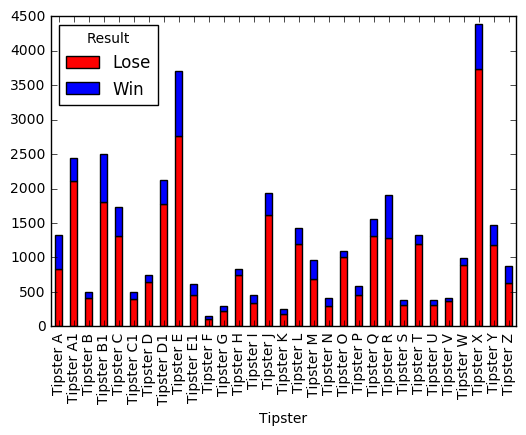

In [10]:
# Tipster's performance
cross_tab = pd.crosstab(df['Tipster'], df['Result'], margins=True)
cross_tab.iloc[:-1,:-1].plot(kind='bar', stacked=True, color=['red', 'blue'], grid=False)

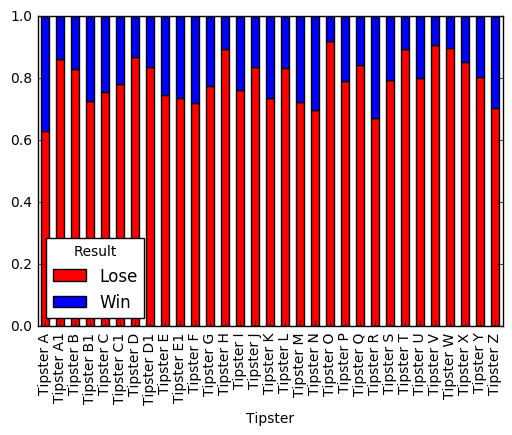

In [11]:
# percentage conversion
def perConvert(ser):
    return ser/float(ser[-1])
cross_tab1 = cross_tab.apply(perConvert, axis=1)
cross_tab1.iloc[:-1,:-1].plot(kind='bar', stacked=True, color=['red', 'blue'], grid=False)

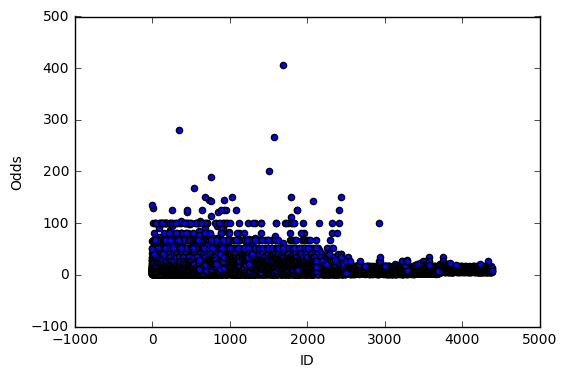

In [12]:
# checking for outliers in continous data
df.plot.scatter('ID', 'Odds')

## Checking for missing values

In [13]:
df.apply(lambda x: sum(x.isnull()))
# dataset looks clear of any null values, good here!

ID               0
Tipster          0
Date             0
Track            0
Horse            0
Bet Type         0
Odds             0
Result           0
TipsterActive    0
dtype: int64

In [14]:
# since we cannot plug categorical values we need to convert it to numerical values 
# this is taken care by the LabelEncoder() function from sklearm.preprocessing
le = LabelEncoder()
for var in cat_var:
    df[var] = le.fit_transform(df[var])

In [15]:
print(cat_var)
print(df.head())

Index([u'Tipster', u'Date', u'Track', u'Horse', u'Bet Type', u'Result'], dtype='object')
     ID  Tipster  Date  Track  Horse  Bet Type  Odds  Result TipsterActive
UID                                                                       
1     1        0   818      2   5157         1  8.00       0          True
2     2        0   818     96  13103         1  4.50       0          True
3     3        0   818    114  13406         1  7.00       0          True
4     4        0   818     74   8974         1  5.00       0          True
5     5        0   851      2  10550         1  4.33       1          True


## Creating X and y arrays for further processing

In [16]:
# creating a seperate prediction set for post cross validation
df_X_test = df.iloc[-20:,:-2] 
df_y_test = df.iloc[-20:,-2:-1]
df_X_test = df_X_test[['Tipster', 'Track', 'Horse', 'Bet Type', 'Odds']]
df_y_test = df_y_test['Result'] 

print(df_X_test.shape, df_y_test.shape)
# allocating data for cross validation train test split
df_train = df.iloc[:-20]
X = df_train[['Tipster', 'Track', 'Horse', 'Bet Type', 'Odds']]
# I choose to leave out column 'TipsterActive' (Bool variable)
y = df_train.Result.values
print(X.shape, y.shape)
print(X.head())

((20, 5), (20,))
((38228, 5), (38228,))
     Tipster  Track  Horse  Bet Type  Odds
UID                                       
1          0      2   5157         1  8.00
2          0     96  13103         1  4.50
3          0    114  13406         1  7.00
4          0     74   8974         1  5.00
5          0      2  10550         1  4.33


### Data is split into training and test sets

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

((30582, 5), (7646, 5), (30582,), (7646,))


In [18]:
# list of classifiers
classifers = [GaussianNB(), LogisticRegression(n_jobs=-1), DecisionTreeClassifier(min_samples_leaf=5,min_samples_split=17,random_state=1), KNeighborsClassifier(n_neighbors=5, leaf_size=50, p=3)]
for cl in classifers:
    clf = cl
    clf.fit(X_train, y_train)
    accuracy = clf.score(X_test, y_test)*100
    print('Accuracy of %r Classifier = %2f' % (cl, accuracy) + ' %')
    print('\n')
           

Accuracy of GaussianNB() Classifier = 79.178656 %


Accuracy of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=-1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False) Classifier = 79.178656 %


Accuracy of DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=5,
            min_samples_split=17, min_weight_fraction_leaf=0.0,
            presort=False, random_state=1, splitter='best') Classifier = 74.496469 %


Accuracy of KNeighborsClassifier(algorithm='auto', leaf_size=50, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=3,
           weights='uniform') Classifier = 76.170547 %


